In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from IPython.html.widgets import interact

/usr/lib/python3/dist-packages/IPython/html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


In [2]:
%matplotlib inline

In [3]:
def df_dt(x, t, a, b, c, d):
    
    dx = a * x[0] - b * x[0] * x[1]
    dy = - c * x[1] + d * x[0] * x[1]
    
    return np.array([dx, dy])

In [4]:
# Parámetros
a = 0.1
b = 0.02
c = 0.3
d = 0.01

# Condiciones iniciales
x0 = 40
y0 = 9
conds_iniciales = np.array([x0, y0])

# Condiciones para integración
tf = 200
N = 800
t = np.linspace(0, tf, N)

In [5]:
solucion = odeint(df_dt, conds_iniciales, t, args=(a, b, c, d))

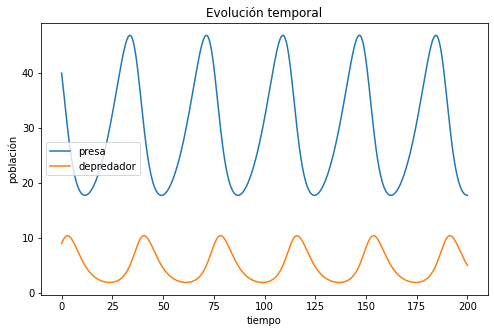

In [6]:
plt.figure("Evolución temporal", figsize=(8,5))
plt.title("Evolución temporal")
plt.plot(t, solucion[:, 0], label='presa')
plt.plot(t, solucion[:, 1], label='depredador')
plt.xlabel('tiempo')
plt.ylabel('población')
plt.legend()
plt.savefig('evolucion_temporal.png')

In [7]:
def solucion_temporal_interact(a, b, c, d, x0, y0, tf):
    
    conds_iniciales = np.array([x0, y0])

    # Condiciones para integración
    N = 800
    t = np.linspace(0, tf, N)
    
    solucion = odeint(df_dt, conds_iniciales, t, args=(a, b, c, d))
    
    plt.figure("Evolución temporal", figsize=(8,5))
    plt.title("Evolución temporal")
    plt.plot(t, solucion[:, 0], label='presa')
    plt.plot(t, solucion[:, 1], label='depredador')
    plt.xlabel('tiempo')
    plt.ylabel('población')
    plt.legend()

Widget Javascript not detected.  It may not be installed or enabled properly.


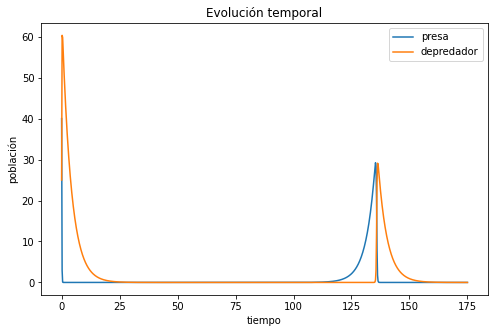

In [8]:
interact(solucion_temporal_interact,
         a=(0.01,0.5), b=(0.01,0.5),
         c=(0.01,0.5), d=(0.01,0.5),
         x0=(1,80), y0=(1,50),
         tf=(50,300));